In [117]:
import pandas as pd
import numpy as np
import seaborn as sns

In [118]:
data_train = pd.read_csv('data/train.csv')
df_train = data_train.copy()
df_train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [119]:
df_train["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: xlabel='Sex'>

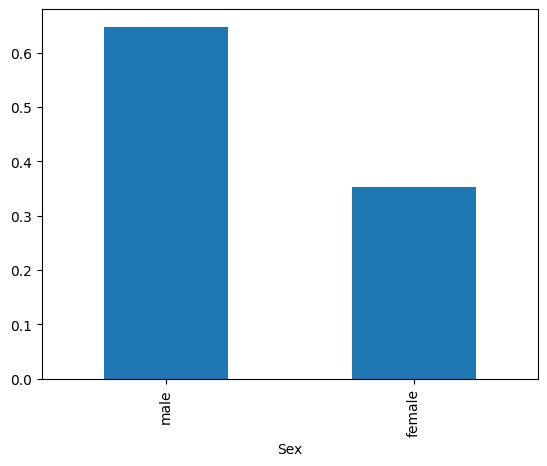

In [120]:
df_train['Sex'].value_counts(normalize=True).plot.bar()

<Axes: xlabel='Pclass'>

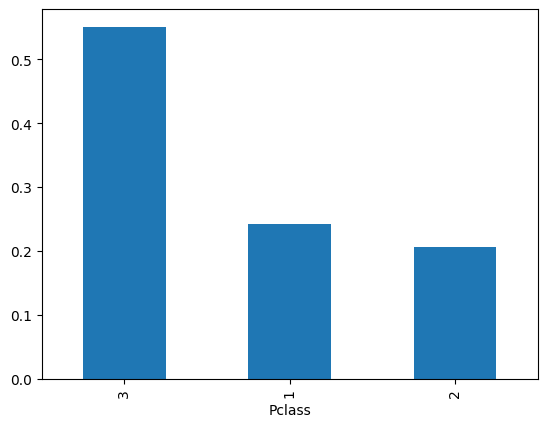

In [121]:
df_train['Pclass'].value_counts(normalize=True).plot.bar()

<Axes: ylabel='Frequency'>

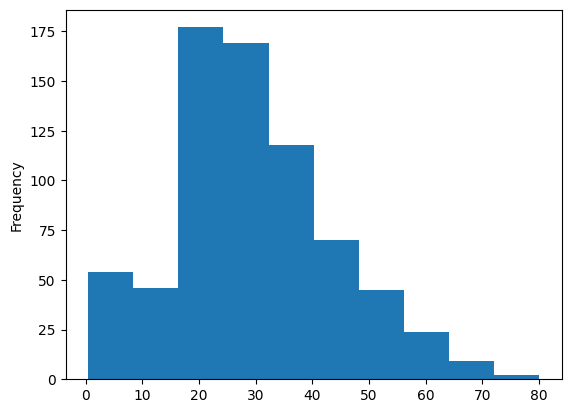

In [122]:
df_train['Age'].plot.hist()

<Axes: xlabel='Parch'>

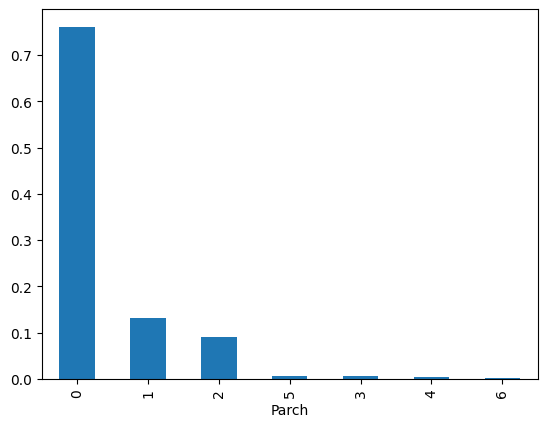

In [123]:
df_train['Parch'].value_counts(normalize=True).plot.bar()

<Axes: ylabel='Frequency'>

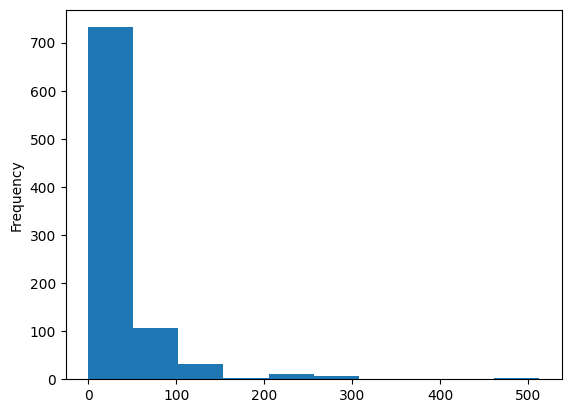

In [124]:
# Fare
df_train["Fare"].plot.hist()

In [125]:
# Cabin
df_train["Cabin"].value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

<Axes: xlabel='Embarked'>

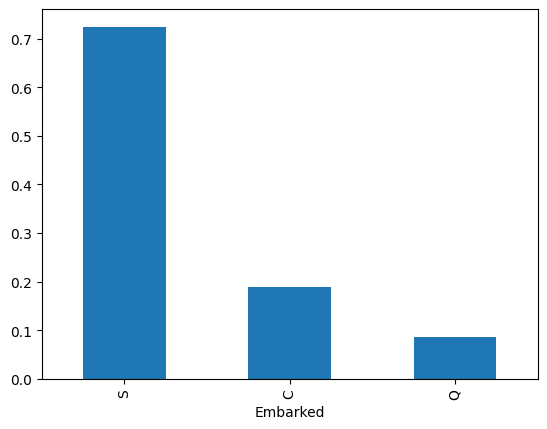

In [126]:
# Embarked
df_train['Embarked'].value_counts(normalize=True).plot.bar()

<Axes: xlabel='SibSp'>

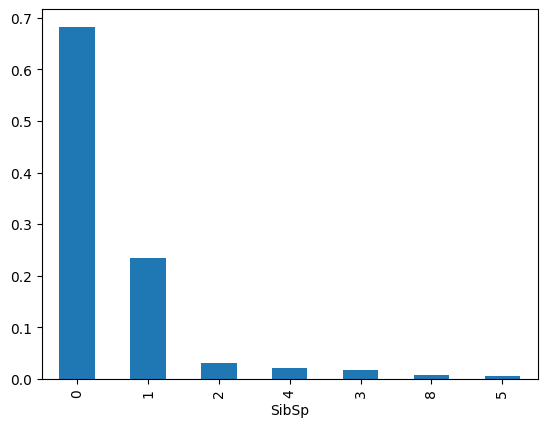

In [127]:
# SibSp
df_train['SibSp'].value_counts(normalize=True).plot.bar()

<Axes: xlabel='Parch'>

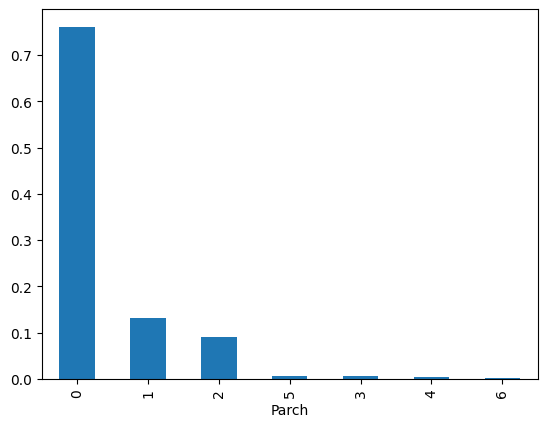

In [128]:
# Parch
df_train['Parch'].value_counts(normalize=True).plot.bar()

In [129]:
# NaN Analysis
df_train.isnull().sum()/len(df_train)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [130]:
cols_to_drop = ['PassengerId', "Name", "Cabin", "Ticket" ]
df_train = df_train.drop(cols_to_drop, axis=1)

In [131]:
df_train.isnull().sum()/len(df_train)

Survived    0.000000
Pclass      0.000000
Sex         0.000000
Age         0.198653
SibSp       0.000000
Parch       0.000000
Fare        0.000000
Embarked    0.002245
dtype: float64

c:\MLOPS\Kaggle\venv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


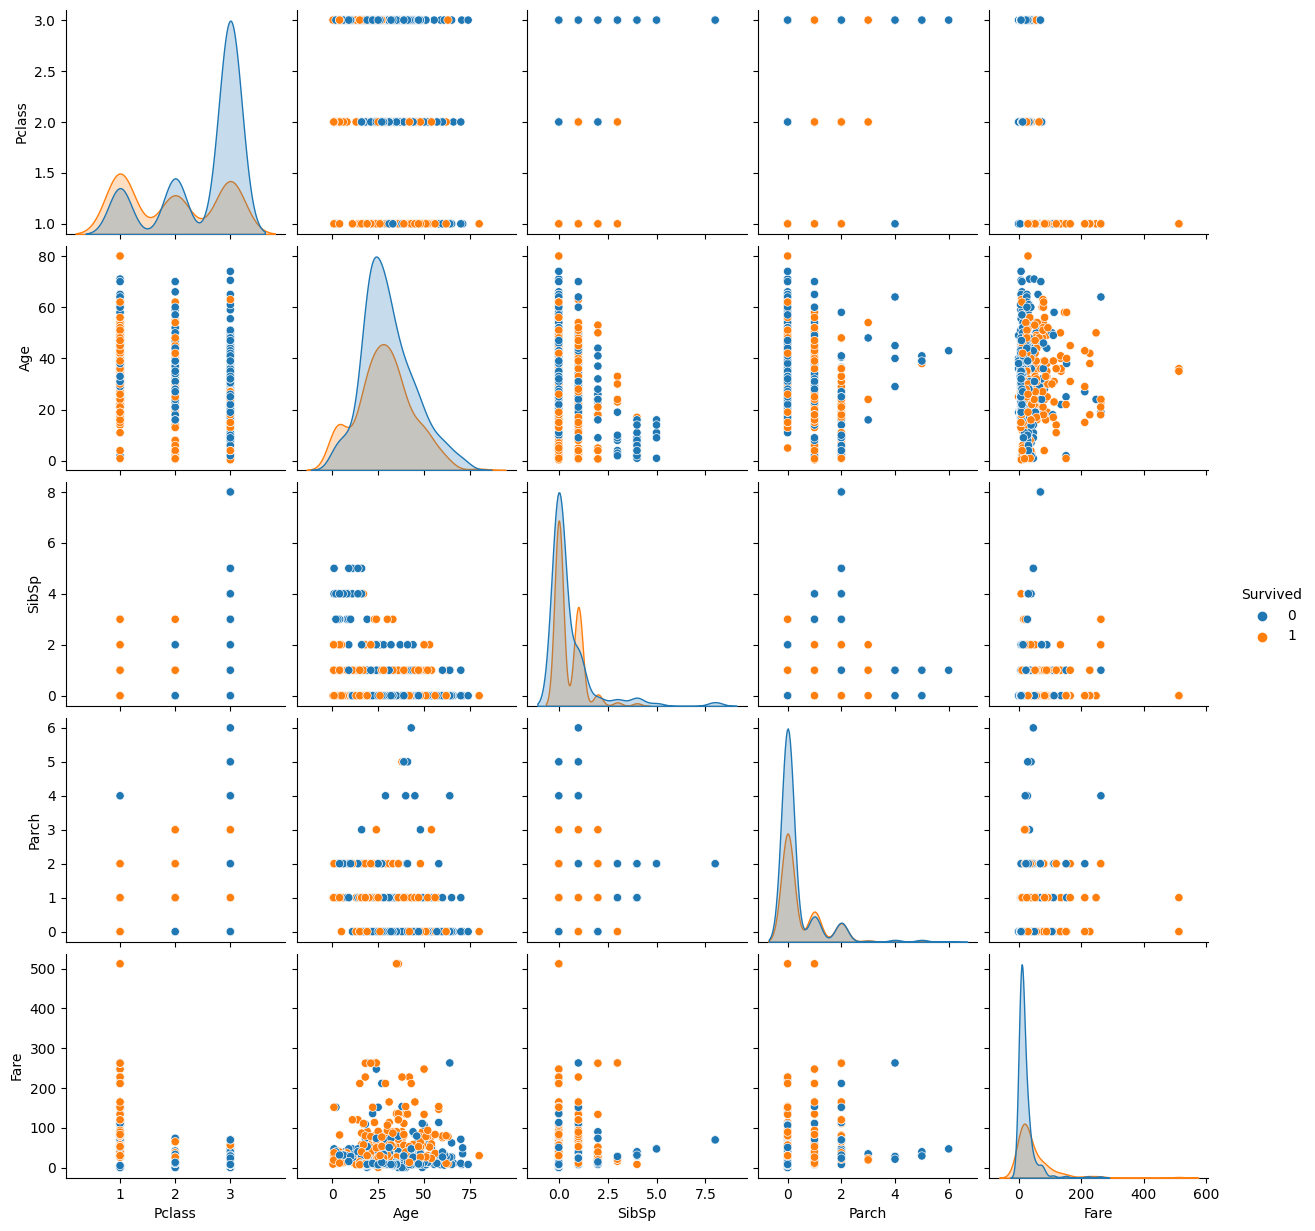

In [132]:
sns.pairplot(df_train,hue= "Survived")

In [133]:
df_train['Age'] = df_train['Age'].fillna(df_train['Age'].median())
df_train["Embarked"] = df_train["Embarked"].fillna(df_train["Embarked"].mode()[0])

In [134]:
df_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [135]:
from sklearn.preprocessing import LabelEncoder

In [136]:
# Feature engineering
cat_cols = df_train.select_dtypes(include='object').columns
for col in cat_cols:
    le = LabelEncoder()
    df_train[col] = le.fit_transform(df_train[col])

In [137]:
df_train['Sex'].value_counts()

Sex
1    577
0    314
Name: count, dtype: int64

c:\MLOPS\Kaggle\venv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


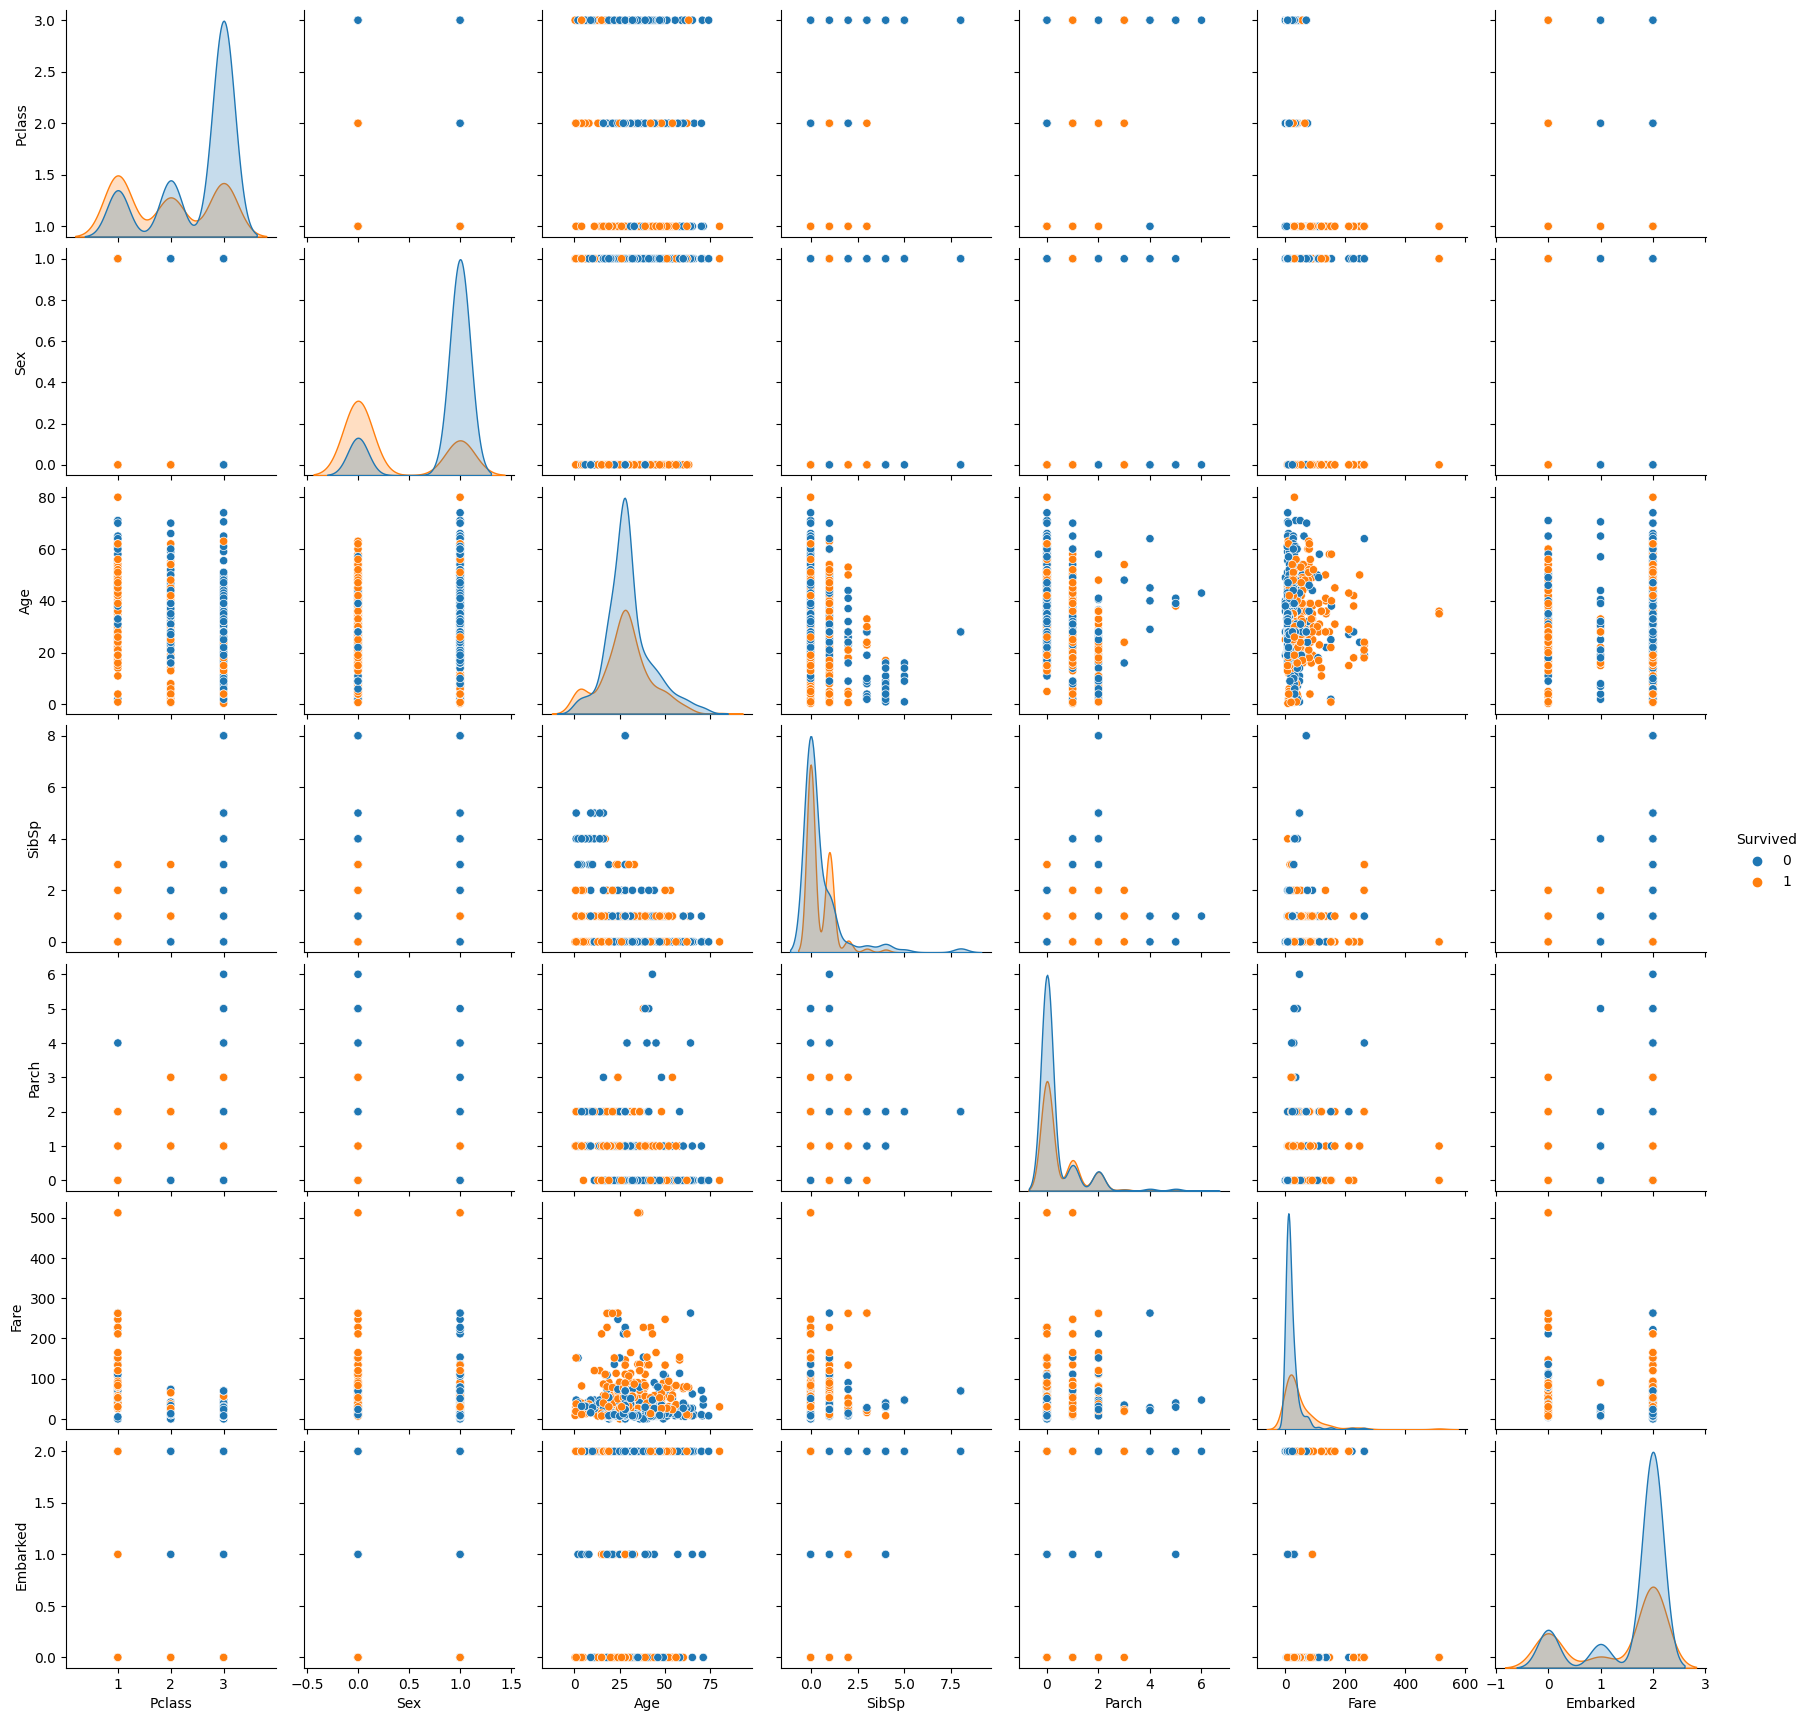

In [138]:
sns.pairplot(df_train,hue= "Survived")

In [178]:
# relation between SibSp and sex
pd.crosstab(df_train.SibSp, df_train.Sex)

Sex,0,1
SibSp,,
0,173,432
1,106,103
2,13,15
3,11,5
4,6,12
5,1,4
8,3,4


In [ ]:
pd.crosstab(df_train.SibSp, df_train.Sex)

# Model Training

In [184]:
# ML model
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

In [185]:
df_train = df_train[df_train["Fare"]< 300]
df_train.loc[df_train["Parch"]> 3,"Parch"] = 4
df_train.loc[df_train["SibSp"]> 3, "SibSp"] = 4

In [186]:
X = df_train.drop(["Survived"], axis=1)
y = df_train.Survived

In [187]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, stratify=y, random_state=42)

In [188]:
X_train.shape

(666, 7)

In [189]:
models = {"RandomForest":RandomForestClassifier(), "AdaBoost":AdaBoostClassifier(),
           "XGBoost": XGBClassifier(), "CatBoost": CatBoostClassifier(verbose=False) }
for name, model in models.items():
    model.fit(X_train, y_train)
    print(f'> {name} : score = {model.score(X_test, y_test):.2f}')

> RandomForest : score = 0.83
> AdaBoost : score = 0.78
> XGBoost : score = 0.81
> CatBoost : score = 0.82


In [190]:
y_pred_test = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred_test)
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86       137
           1       0.78      0.74      0.76        85

    accuracy                           0.82       222
   macro avg       0.81      0.80      0.81       222
weighted avg       0.82      0.82      0.82       222



<Axes: >

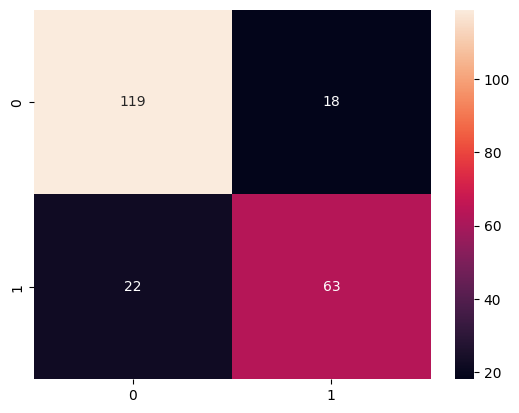

In [191]:
sns.heatmap(conf_matrix, annot=True,  annot_kws={"size": 10}, fmt = 'd')

In [192]:
df_train.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000
mean,0.381757,2.313063,0.647523,29.341408,0.487613,0.373874,30.582164,1.541667
std,0.486091,0.834007,0.478011,13.037026,0.909590,0.764100,41.176366,0.787772
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800,1.000000
50%,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,2.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,30.771850,2.000000
max,1.000000,3.000000,1.000000,80.000000,4.000000,4.000000,263.000000,2.000000


In [193]:
# optimisation

param_grid = {"n_estimators":[1000,2000 ],"max_depth":[2,3,5,10],"eta":[0.3, 0.1, 0.01]}
grid = GridSearchCV(models['XGBoost'], param_grid=param_grid, n_jobs=-1, cv=3)
grid.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'eta': [0.3, 0.1, 0.01], 'max_depth': [2, 3, 5, 10],
                         'n_estimators': [1000, 2000]})

In [194]:
print(grid.best_params_)
print(grid.best_score_)

{'eta': 0.01, 'max_depth': 2, 'n_estimators': 2000}
0.8258258258258259


In [195]:
y_pred_test = grid.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred_test)
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       137
           1       0.80      0.71      0.75        85

    accuracy                           0.82       222
   macro avg       0.81      0.80      0.80       222
weighted avg       0.82      0.82      0.82       222



<Axes: >

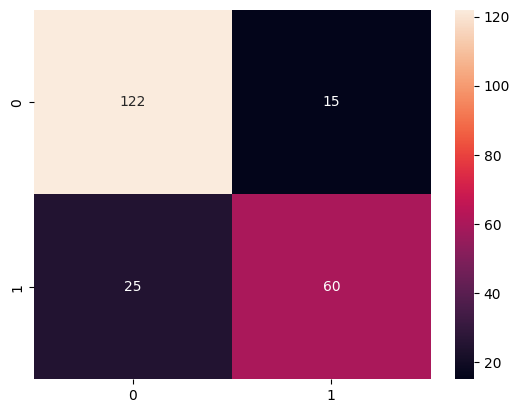

In [196]:
sns.heatmap(conf_matrix, annot=True,  annot_kws={"size": 10}, fmt = 'd')